# Excerise Week 8 -- L16

In [19]:
# imports
import numpy as np
from scipy.ndimage import uniform_filter1d
from scipy.stats import shapiro, bartlett
from matplotlib import pyplot as plt
import pandas

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf

import pymannkendall as mk
# EVA
from pyextremes import EVA

# Peakflow

## Load up data

In [39]:
data_file = '../Data/usgs_03335500_peakflow.csv'

In [40]:
df = pandas.read_csv(data_file)
df.head()

,Time,Annual Peak Streamflow (cfs)
0,16/05/81,44500
1,14/03/82,56400
2,03/05/83,60800
3,14/02/84,40400
4,25/02/85,80400


## Add year as index

In [46]:
years = [str(int(yr)) for yr in np.arange(1981,2016)]
#for item in df.Time:
#    yr = int(item.split('/')[-1])
#    yr = yr+1900 if yr > 50 else yr+2000
#    years.append(str(yr))
#
date = pandas.to_datetime(years)
df['Date'] = date
df.set_index('Date', inplace=True)
df.head()

,Time,Annual Peak Streamflow (cfs)
Date,,
1981-01-01,16/05/81,44500
1982-01-01,14/03/82,56400
1983-01-01,03/05/83,60800
1984-01-01,14/02/84,40400
1985-01-01,25/02/85,80400


## Plot

<AxesSubplot:xlabel='Date'>

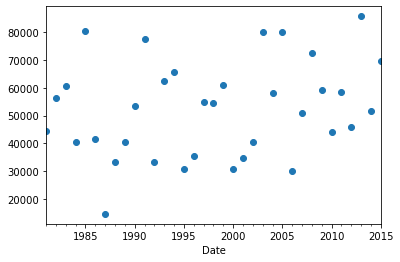

In [48]:
df['Annual Peak Streamflow (cfs)'].plot(marker='o', ls='')

## Sort

In [49]:
x_sort = np.sort(df['Annual Peak Streamflow (cfs)'].values)
x_sort

array([14700, 30100, 30800, 31000, 33300, 33300, 34800, 35400, 40400,
       40700, 40700, 41600, 44300, 44500, 45800, 50800, 51500, 53300,
       54500, 54800, 56400, 58300, 58400, 59200, 60800, 61100, 62500,
       65600, 69500, 72400, 77400, 80000, 80000, 80400, 85700])

## $F(x)$

In [50]:
n=len(x_sort)
F_x=(np.arange(n)+1)/(n+1)

## Plot

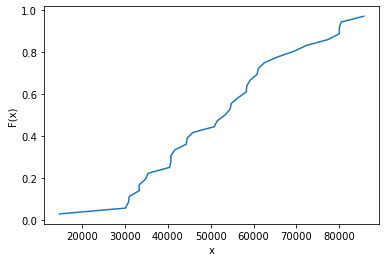

In [51]:
plt.clf()
ax = plt.gca()
ax.plot(x_sort, F_x)
#
ax.set_ylabel('F(x)')
ax.set_xlabel('x')
plt.show()

## Return Periods

In [52]:
T=1/(1-F_x)

### Plot

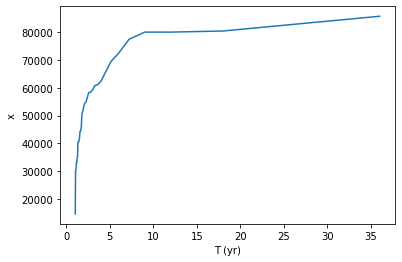

In [53]:
plt.clf()
ax = plt.gca()
ax.plot(T, x_sort)
#
ax.set_xlabel('T (yr)')
ax.set_ylabel('x')
plt.show()

# Fit EVD

## Model

In [54]:
model = EVA(df['Annual Peak Streamflow (cfs)'])

In [55]:
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:  Annual Peak Streamflow (cfs)      Size:                                  35
Start:                       January 1981      End:                         January 2015
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

## Extract

In [58]:
model.get_extremes(method="BM", block_size="366.2425D")

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Date', ylabel='Annual Peak Streamflow (cfs)'>)

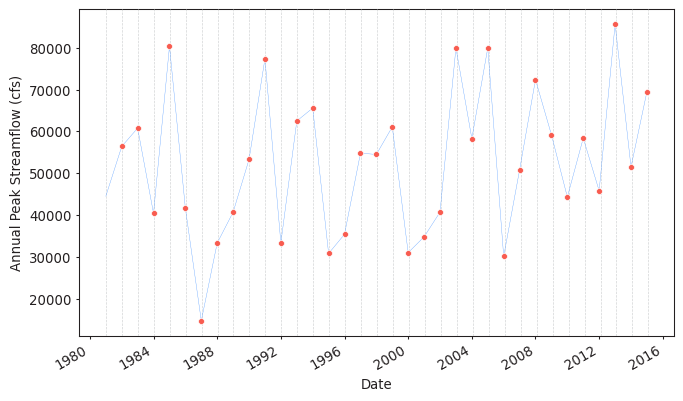

In [59]:
model.plot_extremes()

In [60]:
model.fit_model()

## Summary

In [61]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)

/home/xavier/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [62]:
summary

,return value,lower ci,upper ci
return period,,,
1.0,-inf,NaN,NaN
2.0,4.995947e+04,44727.568083,56171.277085
5.0,6.831105e+04,60015.396767,75624.128039
10.0,8.045483e+04,69388.605803,89305.510246
25.0,9.579636e+04,80971.418578,106962.184499
50.0,1.071769e+05,89313.467285,120398.320551
100.0,1.184732e+05,97388.767562,133721.731223
250.0,1.333465e+05,107918.740344,150994.568999
500.0,1.445769e+05,116025.746947,164242.231124


(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='Annual Peak Streamflow (cfs)'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='Annual Peak Streamflow (cfs)', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

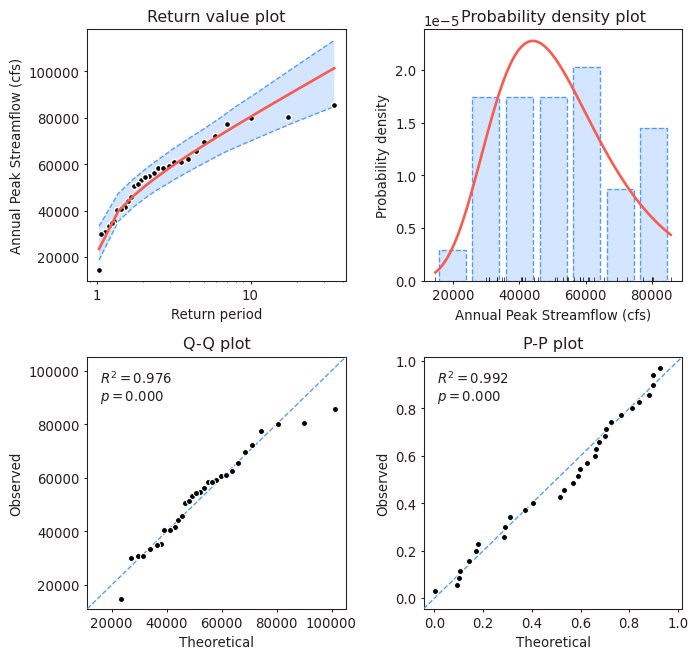

In [63]:
model.plot_diagnostic(alpha=0.95)